In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 0s (2,174 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 155219 files and directories currently installed.)
Preparing t

In [ ]:
!pip install PyAudio

  Created wheel for PyAudio: filename=PyAudio-0.2.11-cp37-cp37m-linux_x86_64.whl size=52614 sha256=397ae98fb61e47768e21c65b072b239653a72a7bc74132251f6e305c7122c2a2
  Stored in directory: /root/.cache/pip/wheels/40/2e/4c/b71e7e96c861a46e6213bc6bb482b94dcf293a92c5e736c1ec
Successfully built PyAudio


In [ ]:
pip install pydub

In [ ]:
# Importing required libraries 
from keras.models import Sequential, Model, model_from_json
import matplotlib.pyplot as plt
import keras 
import pickle
import wave  # !pip install wave
import os
import pandas as pd
import numpy as np
import sys
import warnings
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook
import pyaudio
from tensorflow.keras import optimizers
import tensorflow
from IPython.display import Audio, Javascript
from scipy.io import wavfile
from base64 import b64decode
import music21
from pydub import AudioSegment

In [ ]:
data, sampling_rate = librosa.load('/content/download (2).wav')
ipd.Audio('/content/download (2).wav')

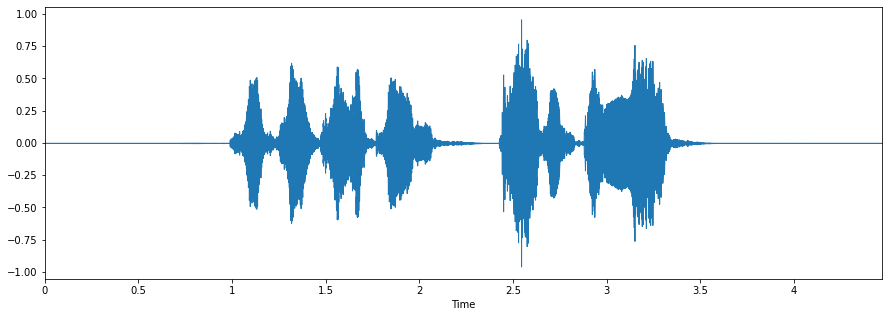

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
opt = tensorflow.keras.optimizers.RMSprop()

In [ ]:
# loading json and model architecture 
json_file = open('/content/model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/Emotion_Model.h5")
print("Loaded model from disk")

# the optimiser
opt= tensorflow.keras.optimizers.RMSprop(lr=0.0003, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Loaded model from disk


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# Lets transform the dataset so we can apply the predictions
X, sample_rate = librosa.load('/content/download (2).wav'
                              ,res_type='kaiser_fast'
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5
                             )

sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,-45.603596,-45.603596,-45.603596,-45.603596,-45.603596,-45.603596,-45.603596,-45.476234,-45.004837,-45.121902,-45.820045,-45.451668,-45.064533,-44.544884,-43.937202,-44.093384,-44.984074,-44.942184,-44.463657,-43.870823,-43.812462,-43.36692,-44.129509,-43.5662,-42.8731,-43.602097,-42.593369,-43.287067,-44.339798,-43.954971,-44.549496,-45.579533,-45.716038,-46.463882,-45.602821,-44.896458,-45.173923,-44.861729,-44.215435,-45.11834,...,-13.718847,-13.325217,-13.137577,-12.314804,-15.832264,-16.98723,-18.646946,-20.03775,-21.476492,-23.139484,-23.013842,-19.944435,-19.386005,-21.550499,-21.10988,-22.758772,-22.87602,-17.707756,-15.96137,-17.948347,-17.88998,-16.531822,-15.98765,-14.569661,-15.504424,-18.158894,-18.726412,-19.887266,-13.75865,-6.357054,-4.606462,-8.836376,-13.115195,-14.215149,-14.317164,-14.801488,-17.297966,-17.823124,-14.271404,-9.770849


In [ ]:
# Apply predictions
newdf= np.expand_dims(newdf, axis=2)
newpred = loaded_model.predict(newdf, 
                         batch_size=16, 
                         verbose=1)

newpred

1/1 [==============================] - 0s 198ms/step


array([[0.0000000e+00, 3.7616582e-37, 0.0000000e+00, 0.0000000e+00,
        3.8350017e-22, 3.1589891e-25, 0.0000000e+00, 7.2406936e-23,
        9.6117350e-16, 5.8278924e-26, 2.0668866e-23, 1.0000000e+00,
        1.8868159e-13, 1.1027892e-31]], dtype=float32)

In [ ]:
filename = '/content/labels'
infile = open(filename,'rb')
lb = pickle.load(infile)
infile.close()

# Get the final predicted label
final = newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform((final)))
print(final) #emo(final) #gender(final) 

['male_neutral']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
pip install sounddevice

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'0.22.2.post1'

In [ ]:
pip --version


pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [ ]:
pip install sklearn

In [ ]:
pip install sounddevice

In [ ]:
pip install wavio


In [ ]:
import sounddevice
from scipy.io.wavfile import write
for i in range(2):
    fps=44100
    duration=10
    print('recording')
    recording=sounddevice.rec(int(duration*fps),samplerate=fps,channels=2)
    sounddevice.wait()
    print('done')
    write('output.wav',fps,recording)

recording


PortAudioError: ignored

In [ ]:
# import required libraries
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

# Sampling frequency
freq = 44100

# Recording duration
duration = 5

# Start recorder with the given values
# of duration and sample frequency
recording = sd.rec(int(duration * freq),
				samplerate=freq, channels=3)

# Record audio for the given number of seconds
sd.wait()

# This will convert the NumPy array to an audio
# file with the given sampling frequency
write("recording0.wav", freq, recording)

# Convert the NumPy array to audio file
wv.write("recording1.wav", recording, freq, sampwidth=2)


PortAudioError: ignored